Eda and model training

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split

In [2]:
df = pd.read_csv("../Data/SAML-D.csv")
pd.set_option("display.max_columns",None)

In [3]:
df.isnull().sum()

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64

In [4]:
df['Is_laundering'].value_counts()

Is_laundering
0    9494979
1       9873
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB


In [6]:
numeric_data = df.select_dtypes(include='number')

In [7]:
numeric_data.corr()

,Sender_account,Receiver_account,Amount,Is_laundering
Sender_account,1.000000,0.000539,-0.000003,0.001590
Receiver_account,0.000539,1.000000,0.000294,-0.000382
Amount,-0.000003,0.000294,1.000000,0.040063
Is_laundering,0.001590,-0.000382,0.040063,1.000000


<Axes: >

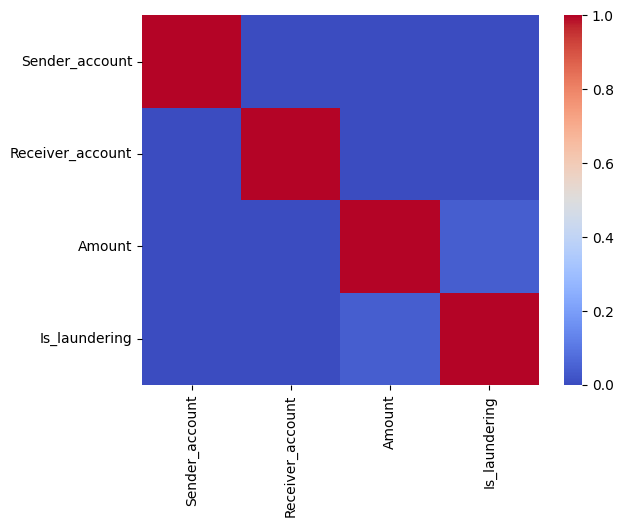

In [8]:
sns.heatmap(numeric_data.corr(),cmap='coolwarm')

In [9]:
sorted(df['Received_currency'].unique()) 

['Albanian lek',
 'Dirham',
 'Euro',
 'Indian rupee',
 'Mexican Peso',
 'Moroccan dirham',
 'Naira',
 'Pakistani rupee',
 'Swiss franc',
 'Turkish lira',
 'UK pounds',
 'US dollar',
 'Yen']

In [10]:
sorted(df['Payment_currency'].unique())

['Albanian lek',
 'Dirham',
 'Euro',
 'Indian rupee',
 'Mexican Peso',
 'Moroccan dirham',
 'Naira',
 'Pakistani rupee',
 'Swiss franc',
 'Turkish lira',
 'UK pounds',
 'US dollar',
 'Yen']

In [11]:
df['Date'] = pd.to_datetime(df['Date'],format="%Y-%m-%d")
df['Time'] = pd.to_datetime(df['Time'],format='%H:%M:%S')

In [12]:
df.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,1900-01-01 10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,1900-01-01 10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,1900-01-01 10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,1900-01-01 10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,1900-01-01 10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [13]:
df['Laundering_type'].value_counts()

Laundering_type
Normal_Small_Fan_Out      3477717
Normal_Fan_Out            2302220
Normal_Fan_In             2104285
Normal_Group               528351
Normal_Cash_Withdrawal     305031
Normal_Cash_Deposits       223801
Normal_Periodical          210526
Normal_Plus_Mutual         155041
Normal_Mutual              125335
Normal_Foward               42031
Normal_single_large         20641
Structuring                  1870
Cash_Withdrawal              1334
Deposit-Send                  945
Smurfing                      932
Layered_Fan_In                656
Layered_Fan_Out               529
Stacked Bipartite             506
Behavioural_Change_1          394
Bipartite                     383
Cycle                         382
Fan_In                        364
Gather-Scatter                354
Behavioural_Change_2          345
Scatter-Gather                338
Single_large                  250
Fan_Out                       237
Over-Invoicing                 54
Name: count, dtype: int64

In [14]:
X = df.drop(columns=['Is_laundering']) 
y = df['Is_laundering'] 

In [15]:
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day

In [16]:
X['Hour'] = X['Time'].dt.hour
X['Minute'] = X['Time'].dt.minute
X['Second'] = X['Time'].dt.second

In [17]:
X = X.drop(columns=['Date', 'Time'])

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

categorical_columns = [
    'Payment_currency', 
    'Received_currency', 
    'Sender_bank_location', 
    'Receiver_bank_location', 
    'Payment_type', 
    'Laundering_type'
]
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])

In [20]:
import numpy as np

for col in categorical_columns:
    # Get unique classes from training data
    classes = label_encoders[col].classes_

    # Create a mapping dictionary for fast lookup
    mapping = {category: label_encoders[col].transform([category])[0] for category in classes}

    # Apply mapping with default value (-1) for unseen categories
    X_test[col] = X_test[col].map(mapping).fillna(-1).astype(int)


In [21]:
X_train

,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Laundering_type,Year,Month,Day,Hour,Minute,Second
9319977,8109671189,8312632191,14871.11,10,10,16,16,0,13,2023,8,16,23,2,27
8237101,1161186986,2258630892,288.87,10,10,16,16,2,12,2023,7,10,22,0,50
1615570,4497311755,9107378008,268.91,10,10,16,16,6,20,2022,12,1,11,37,1
6985779,930728348,1975522020,683.19,10,10,16,16,0,20,2023,5,29,22,1,4
1566909,3308283621,2671243863,13715.83,10,4,16,7,5,13,2022,11,29,17,17,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204212,3506766587,9102459452,5707.67,10,10,16,16,6,13,2023,6,6,12,51,44
2234489,124238832,9941535773,23688.50,10,10,16,16,3,14,2022,12,22,16,16,30
4304572,1626891464,6233081245,5337.69,10,10,16,16,3,14,2023,2,28,14,58,38
6550634,8539953506,9855504386,936.88,10,10,16,16,0,16,2023,5,15,11,29,54


In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.3, random_state=42)

In [23]:
y_train.value_counts()

Is_laundering
0    7595922
1       7959
Name: count, dtype: int64

In [24]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [25]:
y_resampled.value_counts()

Is_laundering
0    7595922
1    2278776
Name: count, dtype: int64

In [26]:
X_resampled

,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Laundering_type,Year,Month,Day,Hour,Minute,Second
0,8109671189,8312632191,14871.110000,10,10,16,16,0,13,2023,8,16,23,2,27
1,1161186986,2258630892,288.870000,10,10,16,16,2,12,2023,7,10,22,0,50
2,4497311755,9107378008,268.910000,10,10,16,16,6,20,2022,12,1,11,37,1
3,930728348,1975522020,683.190000,10,10,16,16,0,20,2023,5,29,22,1,4
4,3308283621,2671243863,13715.830000,10,4,16,7,5,13,2022,11,29,17,17,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874693,3948947904,3011299904,10593.601311,10,8,16,13,5,4,2023,1,10,10,9,36
9874694,3007036289,3139218022,10032.811903,10,10,16,16,4,26,2023,4,18,12,11,17
9874695,8922499320,3293806937,14184.274828,10,10,16,16,1,5,2022,9,4,16,26,23
9874696,8776101999,3178967019,5495.743785,2,1,16,0,5,27,2022,11,7,20,33,58


In [27]:
data = pd.DataFrame(X_resampled, columns=X_resampled.columns)
data['Is_laundering'] = y_resampled

In [28]:
test_data = pd.DataFrame(X_test, columns=X_test.columns)
test_data['Is_laundering'] = y_test

In [29]:
data.to_csv('training_data.csv',index=False)

In [30]:
test_data.to_csv('testing_data.csv',index=False)

In [2]:
data = pd.read_csv("training_data.csv")
test_data = pd.read_csv("testing_data.csv")

In [3]:
data.head()

,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Laundering_type,Year,Month,Day,Hour,Minute,Second,Is_laundering
0,8109671189,8312632191,14871.11,10,10,16,16,0,13,2023,8,16,23,2,27,0
1,1161186986,2258630892,288.87,10,10,16,16,2,12,2023,7,10,22,0,50,0
2,4497311755,9107378008,268.91,10,10,16,16,6,20,2022,12,1,11,37,1,0
3,930728348,1975522020,683.19,10,10,16,16,0,20,2023,5,29,22,1,4,0
4,3308283621,2671243863,13715.83,10,4,16,7,5,13,2022,11,29,17,17,37,0


In [5]:
from sklearn.preprocessing import StandardScaler
features_to_standardize = ['Amount', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']
scaler = StandardScaler()
data[features_to_standardize] = scaler.fit_transform(data[features_to_standardize])
test_data[features_to_standardize] = scaler.transform(test_data[features_to_standardize])

In [12]:
new_X_train = data.drop(columns=['Is_laundering'])
new_y_train = data['Is_laundering']

In [13]:
new_X_test = test_data.drop(columns=['Is_laundering'])
new_y_test = test_data['Is_laundering']

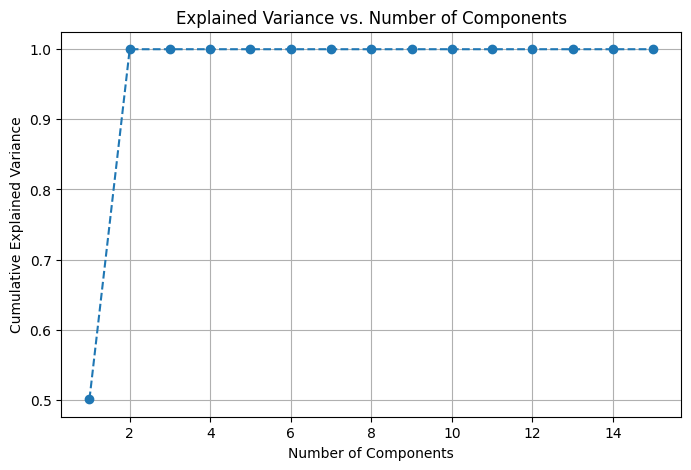

In [14]:
from sklearn.decomposition import PCA
pca_full = PCA()
X_train_pca_full = pca_full.fit_transform(new_X_train)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()


In [15]:
n_components_optimal = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components to retain 95% variance: {n_components_optimal}")

Optimal number of components to retain 95% variance: 2


In [16]:
pca = PCA(n_components=n_components_optimal)
X_train_pca = pca.fit_transform(new_X_train)
X_test_pca = pca.transform(new_X_test)

In [17]:
train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])

In [18]:
train_pca_df['Is_laundering'] = new_y_train.reset_index(drop=True)
test_pca_df['Is_laundering'] = new_y_test.reset_index(drop=True)

In [19]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Transformed Training Data:")
print(train_pca_df.head())
print("Transformed Testing Data:")
print(test_pca_df.head())

Explained variance ratio: [0.50085993 0.49914007]
Transformed Training Data:
            PC1           PC2  Is_laundering
0  3.849233e+09  2.375422e+09              0
1 -3.435932e+09 -3.268933e+09              0
2  3.929278e+09 -1.322463e+09              0
3 -3.758316e+09 -3.440194e+09              0
4 -2.615277e+09 -1.242409e+09              0
Transformed Testing Data:
            PC1           PC2  Is_laundering
0  1.784457e+09  7.120659e+08              0
1 -4.018588e+09  1.226904e+09              0
2  1.381228e+08 -4.267349e+08              0
3  4.437623e+08 -3.714079e+09              0
4 -9.593024e+08  3.260120e+09              0


In [20]:
new_data = data.sample(frac=0.5, random_state=43)
data_train_x= new_data[['Day', 'Month', 'Year', 'Hour', 'Minute', 'Second']]
data_train_y = new_data['Is_laundering']

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(data_train_x, data_train_y)

RandomForestClassifier(random_state=42)

In [22]:
new_x_test = test_data[['Day', 'Month', 'Year', 'Hour', 'Minute', 'Second']]
new_y_test = test_data['Is_laundering'] 

In [23]:
predictions = model.predict(new_x_test)

: 

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

KeyboardInterrupt: 